### Plotting bias maps

In [1]:
import sys
sys.path.insert(0,'../../')
from radiation import process_ceres_data, process_model_data
from radiation import plot_mean_bias

In [5]:
from aqua import catalogue, inspect_catalogue
cat=catalogue()

IFS	fdb-tco399	fdb-long data tco399 grid
	- fdb-long-2d	FDB data tco399 grid
	- fdb-long-3d	FDB data tco399 grid

IFS-NEMO	control-1950-dev	FDB IFS/NEMO tco1279-orca025 control 1950 run
	- hourly-native	hourly data on native grid TCo1279 (about 10km). Contains tprate(260048), 2t(167), 10u(165), 10v(166), 100u(228246), 100v(228247), sr(173), blh(159), 2d(168), skt(235), chnk(148). See fix yaml for derived vars.
	- hourly-1deg	hourly data on r100 grid. Contains tprate(260048), sf(144), 2t(167), 10u(165), blh(159), sshf(146), slhf(147), ssrd(169), ssr(176), strd(175), str(177), ttr(179), e(182), tsr(178), ewss(180), nsss(181), chnk(148), sro(8), ssro(9). See fix yaml for derived vars.
	- 6hourly-1deg	6hourly data on r100 grid. Contains z(129).
	- monthly-1deg-2d	monthly data on r100 grid. Contains tcc(164), sd(141), tciw(79), tclw(78), msl(151), tcwv(137), lcc(186), mcc(187), hcc(188).
	- monthly-1deg-3d	monthly data on r100 grid. Contains u(131), v(132), t(130), r(157), q(133).
	- lra-r1

In [8]:
from aqua import Reader, plot_single_map
reader = Reader("IFS-NEMO", "historical-1990", "lra-r100-monthly")
data = reader.retrieve()
data

2024-02-21 11:27:44 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-02-21 11:27:44 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly


<xarray.Dataset>
Dimensions:      (time: 137, lat: 180, lon: 360, level: 75, plev: 19)
Coordinates:
  * time         (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2001-05-01
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * level        (level) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    idx_level    (level) int64 dask.array<chunksize=(75,), meta=np.ndarray>
  * plev         (plev) float64 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Data variables: (12/37)
    2t           (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_hc700m   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_siconc   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_sithick  (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    avg_so       (time, level, lat, lon) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    avg_sos      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...           ...
    tcc          (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tciw         (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tclw         (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tprate       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u            (time, plev, lat, lon) float64 dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
    v            (time, plev, lat, lon) float64 dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2024-02-21 11:28:08 AQUA💧: Retrieved from IFS-NEMO_historical...

In [3]:
ifs_nemo_historical = process_model_data(model =  'IFS-NEMO' , exp = 'historical-1990' , source = 'lra-r100-monthly', fix = True)
ceres = process_ceres_data(exp = "ebaf-toa41", source = "monthly", fix=True)

2024-02-21 10:56:51 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-02-21 10:56:51 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
/opt/conda/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


In [18]:
from aqua import Reader, plot_single_map
reader = Reader("CERES", "ebaf-sfc41", "monthly", fix=False)
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:                (time: 265, lon: 360, lat: 180)
Coordinates:
  * time                   (time) datetime64[ns] 2000-03-15 ... 2022-03-15
  * lon                    (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                    (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables: (12/30)
    toa_sw_clr_t_mon       (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_lw_clr_t_mon       (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_net_clr_t_mon      (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_cre_sw_mon         (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_cre_lw_mon         (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_cre_net_mon        (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    ...                     ...
    sfc_net_tot_all_mon    (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    sfc_net_tot_clr_c_mon  (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    sfc_net_tot_clr_t_mon  (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    sfc_cre_net_sw_mon     (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    sfc_cre_net_lw_mon     (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    sfc_cre_net_tot_mon    (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    institution:  NASA Langley Research Center
    title:        CERES EBAF TOA and Surface Fluxes. Monthly Averages and 07/...
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date June 8, 2021
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF_L3B004.1
    history:      Mon Jan 16 07:55:23 2023: cdo -mergetime CERES_EBAF_Ed4.1_S...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

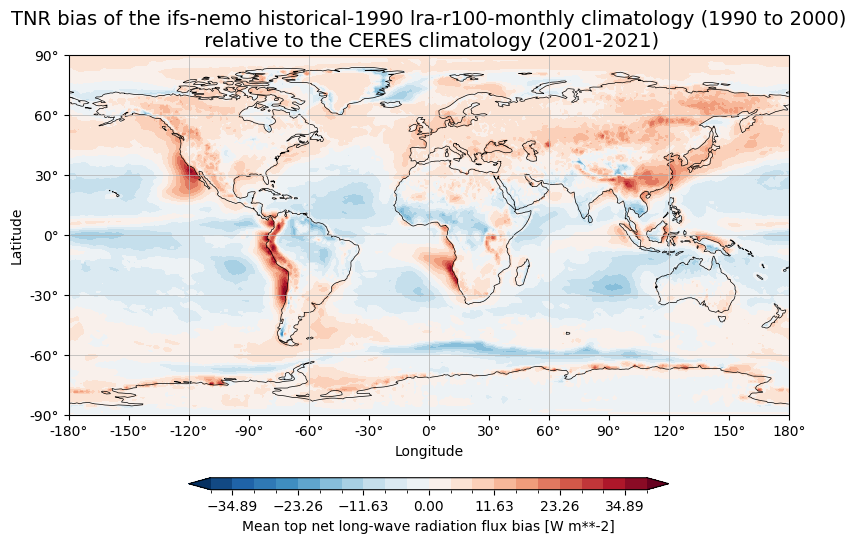

In [5]:
plot_mean_bias(ifs_nemo_historical, var='tnr', ceres=ceres, start_year='1990', end_year='2000')

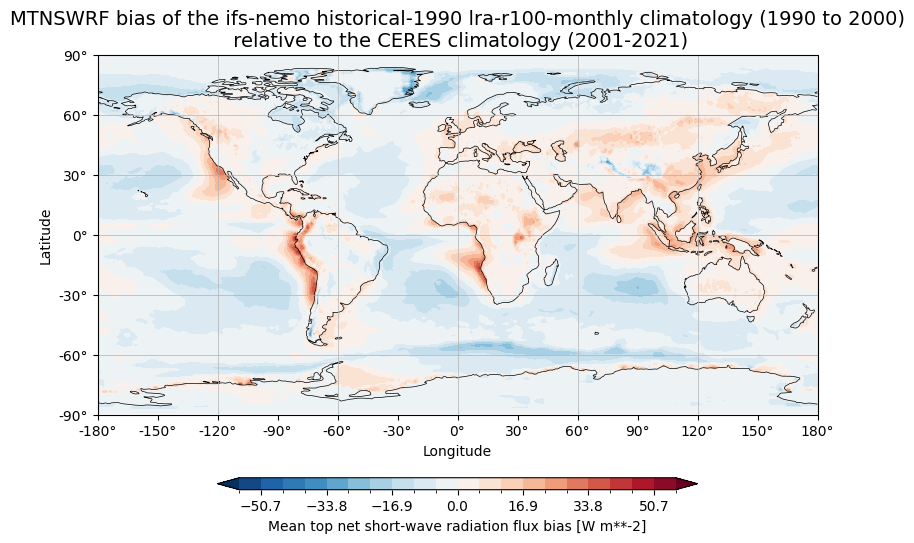

In [15]:
plot_mean_bias(ifs_nemo_historical, var='mtnswrf', ceres=ceres, start_year='1990', end_year='2000', seasons=False)

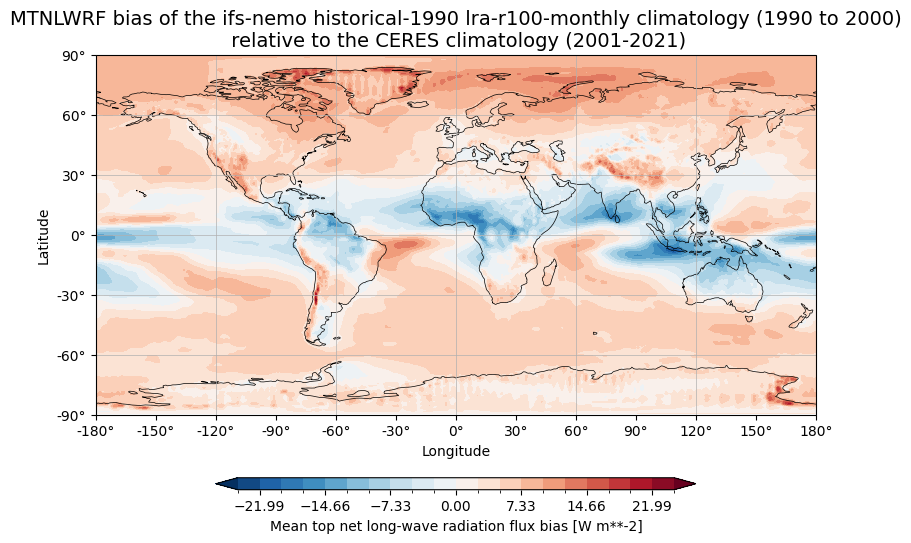

In [16]:
plot_mean_bias(ifs_nemo_historical, var='mtnlwrf', ceres=ceres, start_year='1990', end_year='2000', seasons=False)

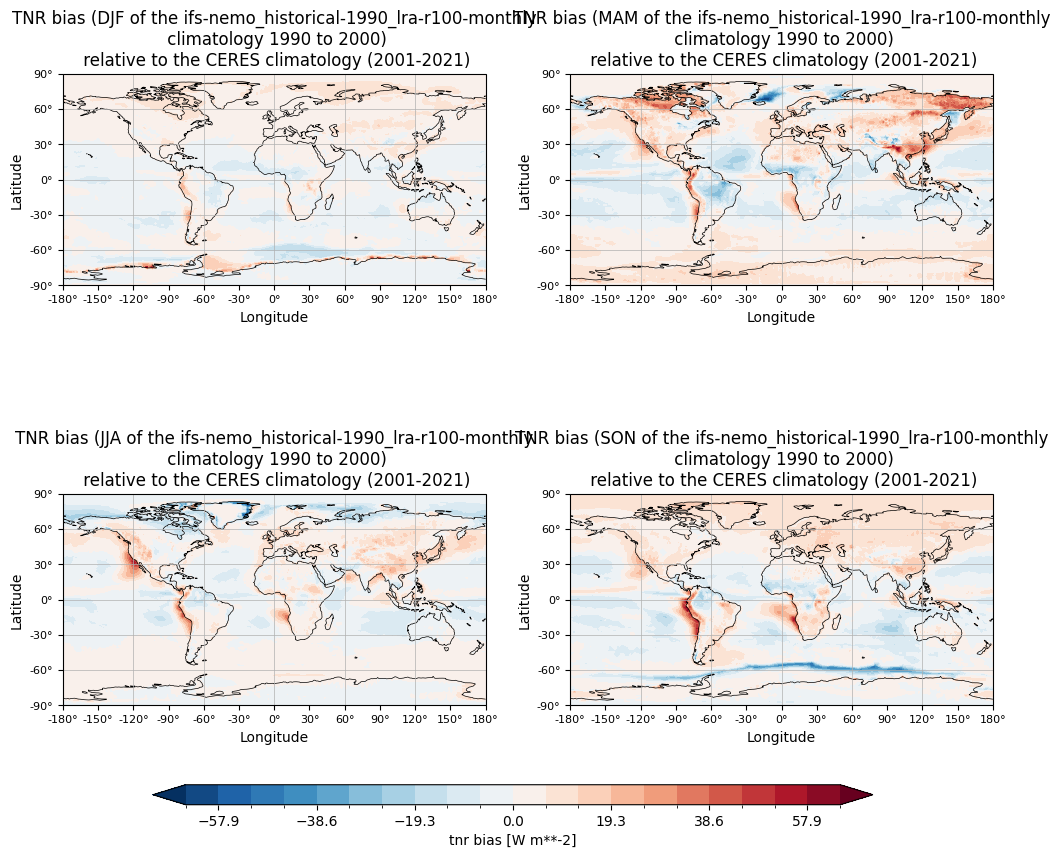

In [17]:
plot_mean_bias(ifs_nemo_historical, var='tnr', ceres=ceres, start_year='1990', end_year='2000', seasons=True)